# GET Data from Nasdaq API

### Set headers

In [1]:
sectors= ['technology', 'telecommunications', 'finance', 'health_care',
          'real_estate','consumer_discretionary', 'consumer_staples', 'industrials',
          'basic_materials','energy', 'utilities']

domain = 'https://www.nasdaq.com'

headers = {
    'authority': 'api.nasdaq.com',
    'accept': 'application/json, text/plain, */*',
    'accept-language': 'es-ES,es;q=0.5',
    'origin': 'https://www.nasdaq.com',
    'referer': 'https://www.nasdaq.com/',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'sec-gpc': '1',
    'user-agent': 'Mozilla/5.0',
}

params = {
    'tableonly': 'true',
    'limit': '20', # Limits the number of stocks for each sector
    'sector': '',
}

### Send request and create dataframe

In [2]:
import pandas as pd
import requests

all_frames = []
sector_df = pd.DataFrame()

for sector in sectors:
    params['sector'] = sector

    response = requests.get('https://api.nasdaq.com/api/screener/stocks', params=params, headers=headers)
    response = response.json()
    sector_df = pd.DataFrame(response['data']['table']['rows'])
    sector_df['sector'] = sector
    sector_df['url'] = domain + sector_df['url']
    all_frames.append(sector_df)

all_sectors_df = pd.concat(all_frames, ignore_index=True)

### Format dataframe

In [3]:

all_sectors_df['lastsale'] = all_sectors_df['lastsale'].str.replace('$','',regex=False)
all_sectors_df['pctchange'] = all_sectors_df['pctchange'].str.replace('%','',regex=False)
all_sectors_df['marketCap'] = all_sectors_df['marketCap'].str.replace(',','',regex=False)
all_sectors_df['lastsale'] = all_sectors_df['lastsale'].astype(float)
all_sectors_df['pctchange'] = pd.to_numeric(all_sectors_df['pctchange'], errors='coerce')
all_sectors_df['netchange'] = pd.to_numeric(all_sectors_df['netchange'], errors='coerce')
all_sectors_df['marketCap'] = all_sectors_df['marketCap'].astype(int)
all_sectors_df

,symbol,name,lastsale,netchange,pctchange,marketCap,url,sector
0,AAPL,Apple Inc. Common Stock,136.145,1.385,1.028,2360392154300,https://www.nasdaq.com/market-activity/stocks/...,technology
1,MSFT,Microsoft Corporation Common Stock,239.580,0.350,0.146,1785942675840,https://www.nasdaq.com/market-activity/stocks/...,technology
2,GOOG,Alphabet Inc. Class C Capital Stock,91.960,-0.840,-0.905,1190238280000,https://www.nasdaq.com/market-activity/stocks/...,technology
3,GOOGL,Alphabet Inc. Class A Common Stock,91.160,-0.960,-1.042,1179883880000,https://www.nasdaq.com/market-activity/stocks/...,technology
4,TSM,Taiwan Semiconductor Manufacturing Company Ltd.,88.960,2.160,2.488,461346560000,https://www.nasdaq.com/market-activity/stocks/tsm,technology
...,...,...,...,...,...,...,...,...
215,XEL,Xcel Energy Inc. Common Stock,70.860,-0.310,-0.436,38778028427,https://www.nasdaq.com/market-activity/stocks/xel,utilities
216,LNG,"Cheniere Energy, Inc. Common Stock",148.525,-7.985,-5.102,36932138276,https://www.nasdaq.com/market-activity/stocks/lng,utilities
217,WCN,"Waste Connections, Inc. Common Shares",132.490,1.900,1.455,34076606597,https://www.nasdaq.com/market-activity/stocks/wcn,utilities
218,ED,"Consolidated Edison, Inc. Common Stock",95.570,-0.920,-0.953,33914242383,https://www.nasdaq.com/market-activity/stocks/ed,utilities


### Plot data
#### Sort all stocks by market capitalization

In [4]:
all_sectors_df.sort_values('marketCap', ascending=False)
all_sectors_df.sort_values('pctchange', ascending=False)

,symbol,name,lastsale,netchange,pctchange,marketCap,url,sector
43,MS,Morgan Stanley Common Stock,98.4703,6.8103,7.430,166425581522,https://www.nasdaq.com/market-activity/stocks/ms,finance
102,TSLA,"Tesla, Inc. Common Stock",131.0101,8.6101,7.034,413697464119,https://www.nasdaq.com/market-activity/stocks/...,consumer_discretionary
5,NVDA,NVIDIA Corporation Common Stock,175.9529,6.9629,4.120,432844134000,https://www.nasdaq.com/market-activity/stocks/...,technology
29,TLK,"PT Telekomunikasi Indonesia, Tbk",25.9050,0.9950,3.994,25662067184,https://www.nasdaq.com/market-activity/stocks/tlk,telecommunications
111,TM,Toyota Motor Corporation Common Stock,144.6300,4.3300,3.086,197338123987,https://www.nasdaq.com/market-activity/stocks/tm,consumer_discretionary
...,...,...,...,...,...,...,...,...
171,SBSW,D/B/A Sibanye-Stillwater Limited ADS,11.6600,-0.6500,-5.280,8250144353,https://www.nasdaq.com/market-activity/stocks/...,basic_materials
176,HMY,Harmony Gold Mining Company Limited,3.7950,-0.2750,-6.757,2345403323,https://www.nasdaq.com/market-activity/stocks/hmy,basic_materials
157,EMR,Emerson Electric Company Common Stock,91.3000,-6.6200,-6.761,53164273395,https://www.nasdaq.com/market-activity/stocks/emr,industrials
48,GS,"Goldman Sachs Group, Inc. (The) Common Stock",345.0400,-28.9600,-7.743,116842478244,https://www.nasdaq.com/market-activity/stocks/gs,finance


#### Plot total market capitalization distribution by sector

<AxesSubplot:ylabel='marketCap'>

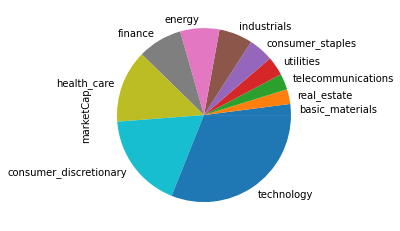

In [5]:
sectors_market_cap = all_sectors_df.groupby('sector')['marketCap'].sum()
sectors_market_cap.sort_values().plot(kind='pie')

#### Plot average percentage change by sector

<AxesSubplot:ylabel='sector'>

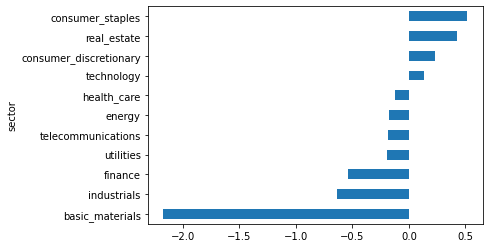

In [6]:
sectors_pctchange = all_sectors_df.groupby('sector')['pctchange'].mean()
sectors_pctchange.sort_values().plot(kind='barh')

#### Plot TOP 10 best percentage changes by company

<AxesSubplot:ylabel='symbol'>

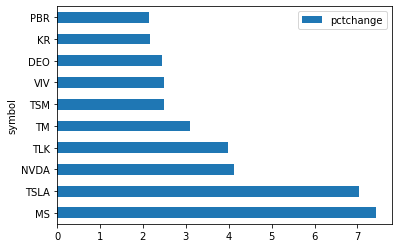

In [7]:
top_pctchange = all_sectors_df.sort_values('pctchange', ascending=False).head(10)
top_pctchange.plot(kind='barh', x='symbol', y='pctchange')

#### Plot TOP 10 worst percentage changes by company

<AxesSubplot:ylabel='symbol'>

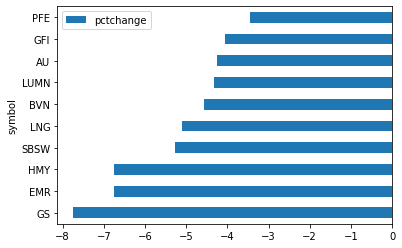

In [8]:
top_pctchange = all_sectors_df.sort_values('pctchange').head(10)
top_pctchange.plot(kind='barh', x='symbol', y='pctchange')